In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
stock_data = pd.read_csv("/content/Stock.csv")

# Clean column names (remove extra spaces and fix casing)
stock_data.columns = stock_data.columns.str.strip().str.capitalize()

# Display column names to confirm
print("Columns:", stock_data.columns)


Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')


In [ ]:
# Convert 'Date' to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort by date
stock_data = stock_data.sort_values(by='Date')

# Set 'Date' as index
stock_data.set_index('Date', inplace=True)


In [ ]:
# Summary of data
print(stock_data.info())
print(stock_data.describe())
print(stock_data.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 944 entries, 2013-02-08 to 2018-02-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    944 non-null    float64
 1   High    944 non-null    float64
 2   Low     944 non-null    float64
 3   Close   944 non-null    float64
 4   Volume  944 non-null    int64  
 5   Name    944 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 51.6+ KB
None
             Open        High         Low       Close        Volume
count  944.000000  944.000000  944.000000  944.000000  9.440000e+02
mean    70.434384   71.098314   69.753991   70.404673  3.449264e+07
std     34.938888   35.196478   34.644271   34.903747  4.671559e+07
min     13.140000   13.420000   12.700000   13.020000  1.307120e+05
25%     57.656700   58.184250   56.447075   57.367475  7.767620e+05
50%     76.038550   76.632800   75.571400   75.980650  5.765800e+06
75%     84.844925   85.473200   84.26

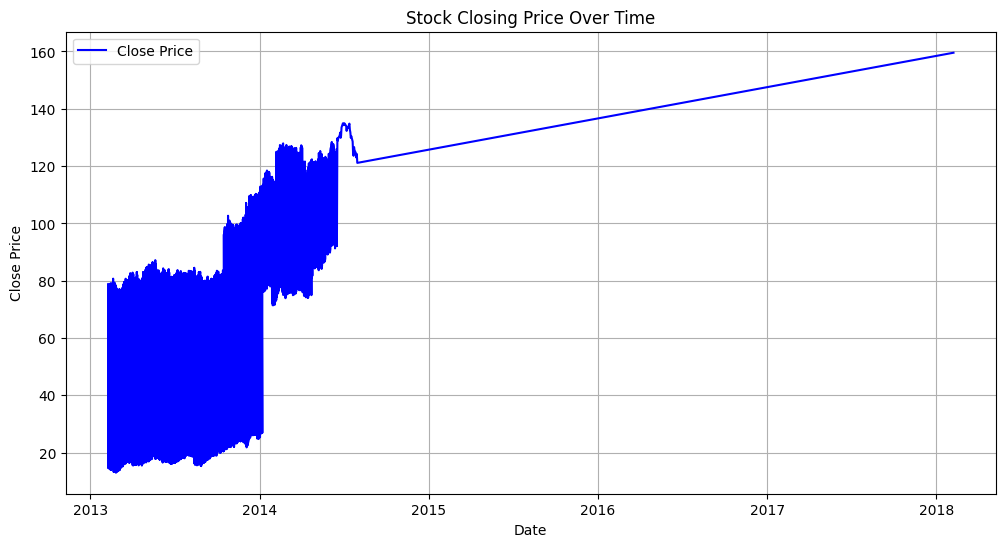

In [ ]:
#visualize closing price over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


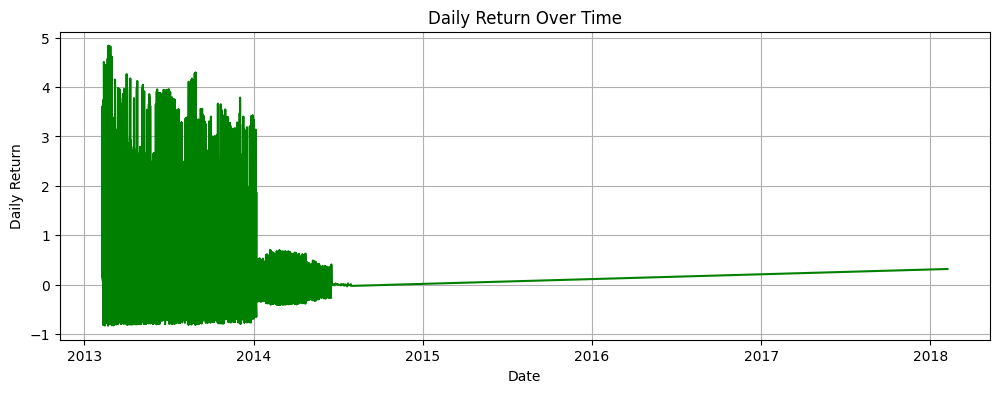

In [ ]:
# Calculate daily return
stock_data['Daily_return'] = stock_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 4))
plt.plot(stock_data['Daily_return'], color='green')
plt.title('Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()


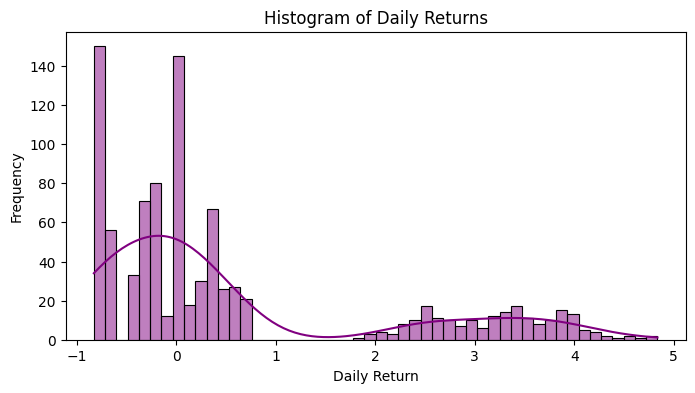

In [ ]:
#histogram of daily returns
plt.figure(figsize=(8, 4))
sns.histplot(stock_data['Daily_return'].dropna(), bins=50, kde=True, color='purple')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


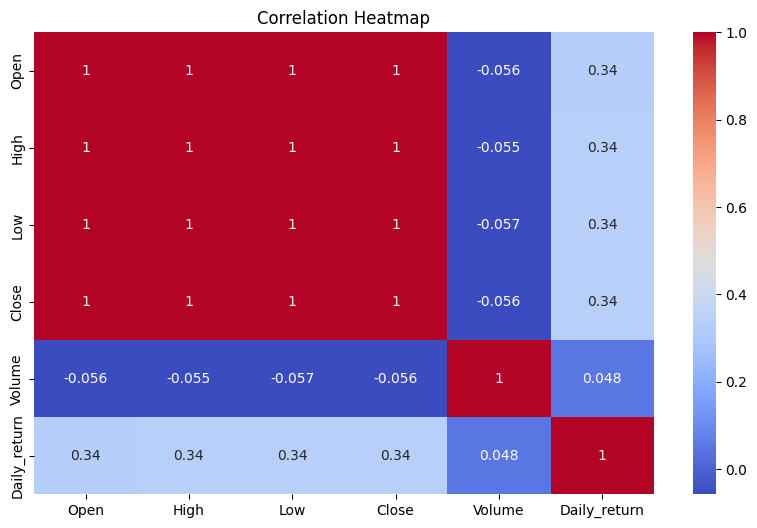

In [ ]:
#corelation heatmap (if having multiple numeric coloumns)
# Select only numeric columns and drop rows with NaNs
numeric_data = stock_data.select_dtypes(include=[np.number]).dropna()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
#save cleaned data
stock_data.to_csv("cleaned_stock_data.csv")


<Figure size 1200x800 with 0 Axes>

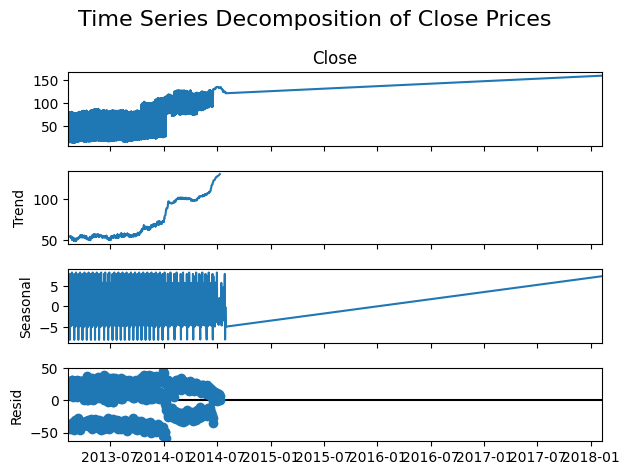

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Use closing prices for decomposition
ts_data = stock_data['Close'].dropna()

# Decompose with a shorter period (e.g., 30 for monthly pattern)
decomposition = seasonal_decompose(ts_data, model='additive', period=30)

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle('Time Series Decomposition of Close Prices', fontsize=16)
plt.tight_layout()
plt.show()


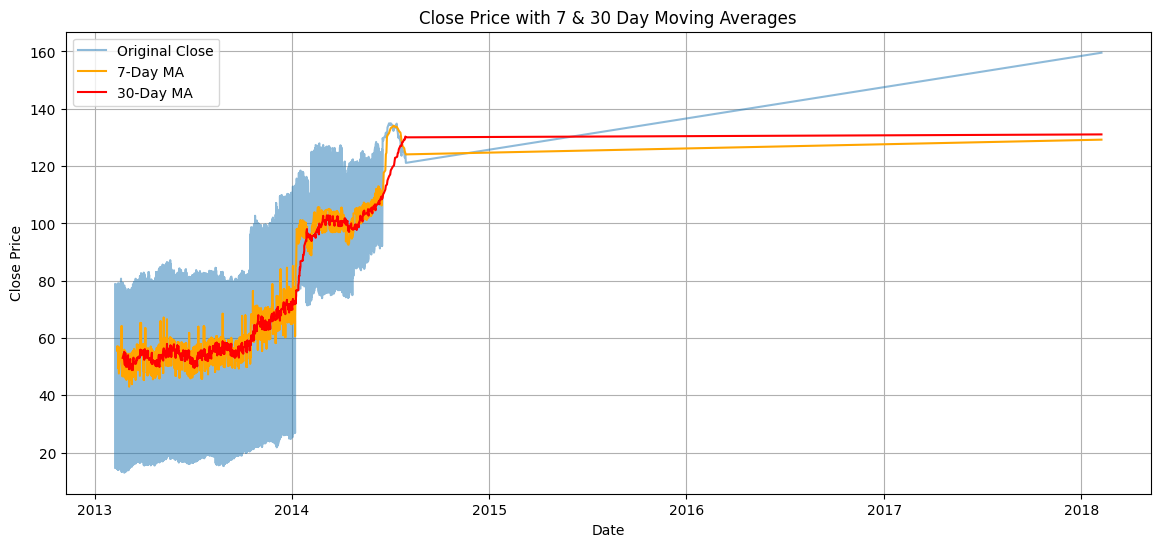

In [ ]:
#reduce noise in data
# Calculate 7-day and 30-day moving averages
stock_data['7_day_MA'] = stock_data['Close'].rolling(window=7).mean()
stock_data['30_day_MA'] = stock_data['Close'].rolling(window=30).mean()

# Plot original Close prices and moving averages
plt.figure(figsize=(14, 6))
plt.plot(stock_data['Close'], label='Original Close', alpha=0.5)
plt.plot(stock_data['7_day_MA'], label='7-Day MA', color='orange')
plt.plot(stock_data['30_day_MA'], label='30-Day MA', color='red')
plt.title('Close Price with 7 & 30 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

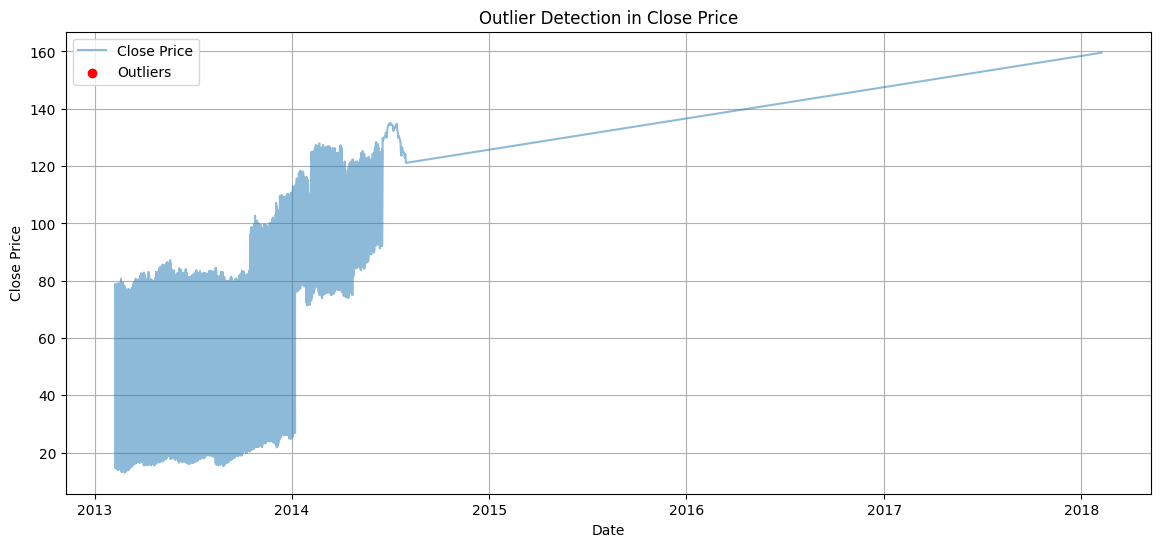

In [ ]:
#outliers detection using z- score method
from scipy import stats
import numpy as np

# Compute Z-scores
z_scores = np.abs(stats.zscore(stock_data['Close'].dropna()))

# Define threshold
threshold = 3

# Get outlier indices
outliers = stock_data[z_scores > threshold]

# Plot outliers
plt.figure(figsize=(14, 6))
plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.scatter(outliers.index, outliers['Close'], color='red', label='Outliers')
plt.title('Outlier Detection in Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show


In [ ]:
#save cleaned data

stock_data.to_csv('cleaned_stock_data.csv', index=True)

print("Cleaned dataset saved as 'cleaned_stock_data.csv'")


Cleaned dataset saved as 'cleaned_stock_data.csv'


In [ ]:
#summarize report template based on EDA
print(" Exploratory Data Analysis Summary")
print("-------------------------------------")
print("1. Dataset contains", stock_data.shape[0], "rows and", stock_data.shape[1], "columns.")
print("2. Date range: From", stock_data.index.min().date(), "to", stock_data.index.max().date())
print("3. Missing values were handled; final dataset is clean.")
print("4. Daily returns calculated and visualized.")
print("5. Distribution of returns shows a slight skewness (check the histogram).")
print("6. Volatility trends are visible in the rolling standard deviation chart.")
print("7. Correlation heatmap showed:")
print(stock_data.select_dtypes(include='number').corr())
print("   - Strong correlation between 'Open', 'High', 'Low', and 'Close'.")
print("   - Weak correlation between 'Volume' and price-based columns.")
print("-------------------------------------")
print(" EDA completed successfully.")



 Exploratory Data Analysis Summary
-------------------------------------
1. Dataset contains 944 rows and 9 columns.
2. Date range: From 2013-02-08 to 2018-02-07
3. Missing values were handled; final dataset is clean.
4. Daily returns calculated and visualized.
5. Distribution of returns shows a slight skewness (check the histogram).
6. Volatility trends are visible in the rolling standard deviation chart.
7. Correlation heatmap showed:
                  Open      High       Low     Close    Volume  Daily_return  \
Open          1.000000  0.999844  0.999826  0.999657 -0.055277      0.335153   
High          0.999844  1.000000  0.999820  0.999843 -0.054361      0.335906   
Low           0.999826  0.999820  1.000000  0.999868 -0.056083      0.335783   
Close         0.999657  0.999843  0.999868  1.000000 -0.055241      0.335986   
Volume       -0.055277 -0.054361 -0.056083 -0.055241  1.000000      0.047529   
Daily_return  0.335153  0.335906  0.335783  0.335986  0.047529      1.000000   

In [ ]:
# Done these basic things of EDA
#Loaded & cleaned the dataset
#Parsed dates and set the index
#Visualized price trends
#Calculated & plotted daily returns
#Analyzed return distribution
#Observed volatility with rolling std. deviation
#Plotted a correlation heatmap
#Summarized insights in a report